In [4]:
!pip install -q langgraph langsmith langchain langchain_groq langchain_community

In [7]:
from google.colab import userdata
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LearningLanggraph"
os.environ["GROQ_API_KEY"] = userdata.get('GROK_LLAMA3')
os.environ["LANGCHAIN_API_KEY"] = userdata.get('Langsmith_api_key')

In [8]:
from langchain_groq import ChatGroq

llm = ChatGroq(model_name = "gemma2-9b-It")

In [9]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7821842b4e50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7821842b5b10>, model_name='gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

# **Building Chatbot using LangGraph**

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
  """
  Messages have the type "list". The 'add_messages' function in the annotation defines how this state
  key should be updated (in this case, it appends messages to the list, rather than overwriting them)
  """
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [13]:
graph_builder

In [14]:
def chatbot(state: State):
  return {"messages":llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node(chatbot)

In [16]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [19]:
graph = graph_builder.compile()

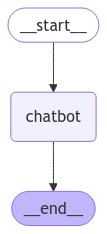

In [20]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [23]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good bye")
    break

  for event in graph.stream({"messages": ("user", user_input)}):
    print(event.values())

    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messages"].content)

User: What is generative AI
dict_values([{'messages': AIMessage(content="Generative AI is a type of artificial intelligence that focuses on **creating new content**. \n\nInstead of simply analyzing and interpreting existing data, generative AI models learn the underlying patterns and structures in data and then use that knowledge to generate new, original data.\n\nHere's a breakdown:\n\n**What it does:**\n\n* **Creates text:** Writes stories, poems, articles, dialogue, code, and more.\n* **Generates images:**  Produces photos, artwork, illustrations, and designs.\n* **Composes music:**  Creates original melodies, harmonies, and musical pieces.\n* **Synthesizes audio:**  Produces realistic speech, sound effects, and voiceovers.\n* **Designs objects:**  Creates 3D models of products, buildings, and other objects.\n\n**How it works:**\n\nGenerative AI models are typically trained on massive datasets of existing content. \n\nThey learn the statistical relationships between different elemen